In [111]:
import numpy
import math
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.pyplot as plts
import colorsys
from matplotlib.patches import Rectangle
import matplotlib.transforms
from PIL import Image


import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import chi2_contingency
from scipy.stats import chisquare

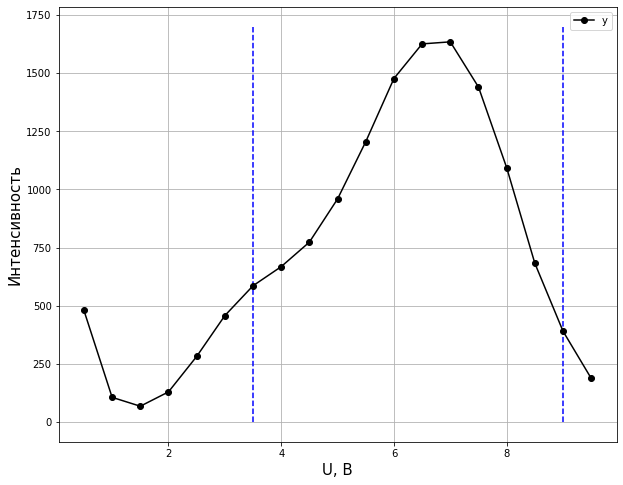

In [112]:
fig,ax=plt.subplots(figsize=(10,8)) 
out = pd.read_csv("0.csv", decimal=",") 
out.sort_values(["x"], axis = 0, inplace = True)
out.plot(ax = ax, x = 'x', y = 'y',  marker = "o", color = "black",  zorder = 10, label = None)

xdata = out["x"]
ydata = out["y"]

plt.plot([3.5,3.5 ], [0, 1700], "b--")
plt.plot([9,9 ], [0, 1700], "b--")


plt.ylabel(r"Интенсивность",size=15)
plt.xlabel(r"U, В",size=15)
plt.grid()
fig.savefig("graph0.png")

In [113]:
def func(x, a, b, c, sigma, mu ):
    return (a * x  + b - c  * np.exp(- (x - mu)**2 / (2 * sigma ** 2)))


# def gauss(x, sigma, mu):
#     return (2 * np.pi * sigma ** 2  )**(-1/2) * np.exp(- (x - mu)**2 / (2 * sigma ** 2))
# def func(x, a, b, c, sigma, mu ):
#     return a * x + b - c * gauss(x, sigma, mu)

Power_divergenceResult(statistic=0.0, pvalue=1.0)


TypeError: 'builtin_function_or_method' object is not subscriptable

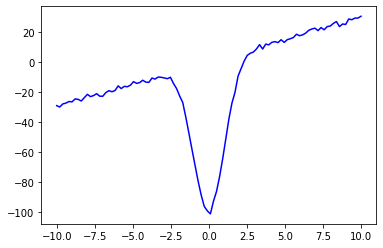

In [123]:

xdata = np.linspace(-10, 10, 100)
y = func(xdata, 3, 0,100, 1, 0)
rng = np.random.default_rng()
y_noise = 1 * rng.normal(size=xdata.size)
ydata = y + y_noise
plt.plot(xdata, ydata, 'b-', label='data')

popt, _ = curve_fit(func, xdata, ydata)
popt
print(chisquare(y, f_exp = y))

# kf_data = np.array[ydata, y]
# kf = chi2_contingency(kf_data)
# print(kf)
plt.plot(xdata, func(xdata, *popt), 'r-',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f, sigma=%5.3f, mu=%5.3f' % tuple(popt))

In [115]:
# for k in range (1, 5, 1):
#     fig,ax=plt.subplots(figsize=(16,12)) 
#     out = pd.read_csv(str(k) + ".csv", decimal=",") 
#     out.sort_values(["x"], axis = 0, inplace = True)
#     out.plot(ax = ax,kind = "scatter",  x = 'x', y = 'y', color = "black", s = 3, zorder = 10, label = None)
    

#     xdata = out["x"]
#     ydata = out["y"]
#     popt, _ = curve_fit(func, xdata, ydata)
#     plt.plot(xdata, func(xdata, *popt), 'r-',
#          label='fit: a=%5.3f, b=%5.3f, c=%5.3f, sigma=%5.3f, mu=%5.3f' % tuple(popt))

8.972933721697899 2.470848721673941 19.602066525279934 1.0274620937319578 8.151199276940199
Power_divergenceResult(statistic=4.075113788049731, pvalue=0.9999999023525915)
16.662124492172474 2.475285310566978 19.637263463831356 1.1145755793737009 8.842299596364695
Power_divergenceResult(statistic=5.784199235420982, pvalue=0.9999990111888113)
22.624091429729557 2.4685610751042506 19.583917862493724 1.3998173625420645 11.10521774283371
Power_divergenceResult(statistic=1.5018802983095747, pvalue=0.9999999998638912)
27.997912256410263 -0.20689238606428817 -1.6413462627766862 2.1386998907355346 16.967019133168574
Power_divergenceResult(statistic=60.20759872301386, pvalue=0.005081950747184607)


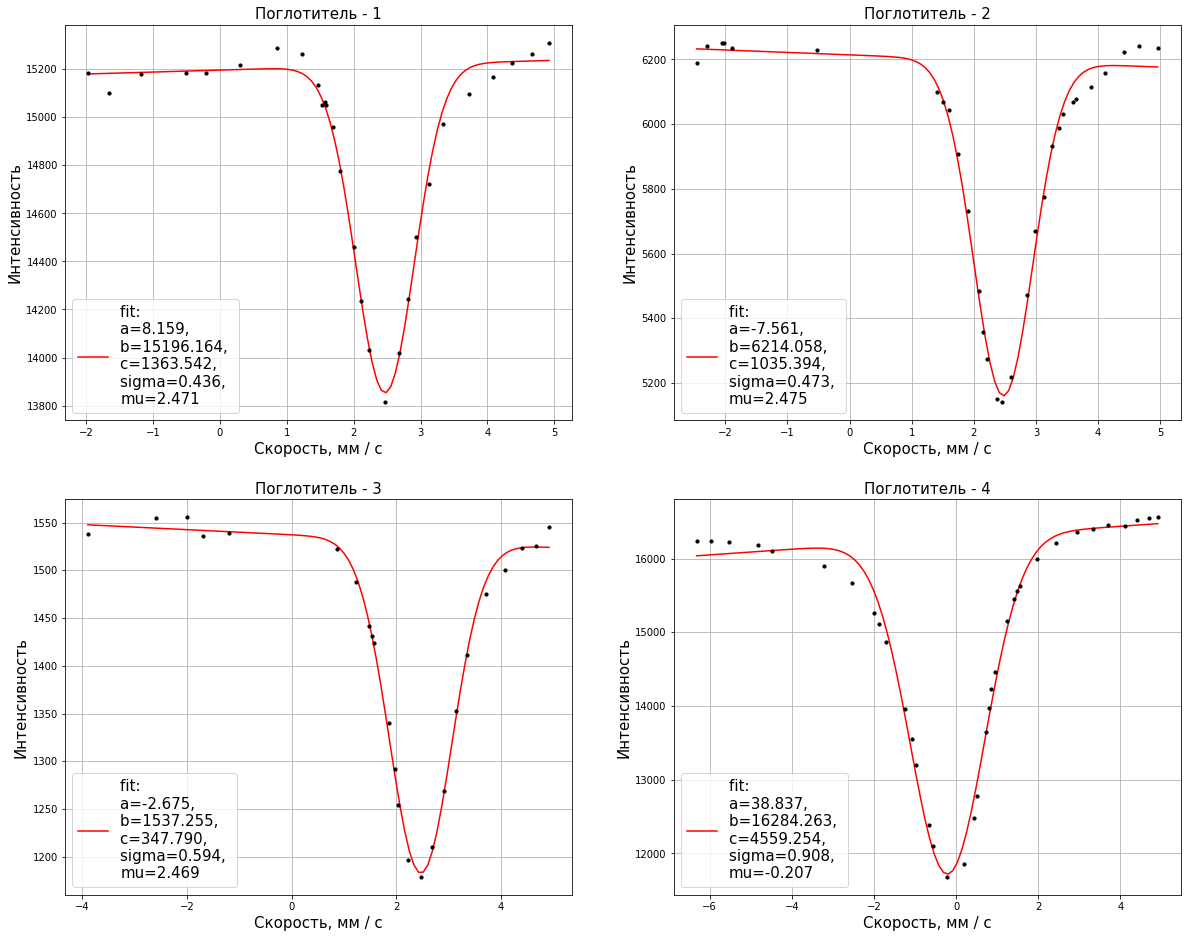

In [121]:
fig,ax=plt.subplots(2, 2, figsize=(20,16)) 
for k in range (1, 5, 1):
    plt.sca(ax[(k - 1)//2, (k - 1)%2])
    
    out = pd.read_csv(str(k) + ".csv", decimal=",") 
    out.sort_values(["x"], axis = 0, inplace = True)
    out.plot(ax = ax[(k - 1)//2, (k - 1)%2],kind = "scatter",  x = 'x', y = 'y', color = "black", s = 10, zorder = 10, label = None)
    

    xdata = out["x"]
    ydata = out["y"]
    xdata_2 = np.linspace(min(xdata), max(xdata), 100)
    p0 = [1, max(ydata), max(ydata) - min(ydata) ,1, xdata[np.argmin(ydata)] ]
 
    popt, _ = curve_fit(func, xdata, ydata, p0 = p0)
   
    plt.plot(xdata_2, func(xdata_2, *popt), 'r-',
         label='fit: \na=%5.3f, \nb=%5.3f, \nc=%5.3f, \nsigma=%5.3f, \nmu=%5.3f' % tuple(popt))
    plt.legend(fontsize = 15, loc = 3)
    
    plt.ylabel(r"Интенсивность",size=15)
    plt.xlabel(r"Скорость, мм / с",size=15)
    ax[(k - 1)//2, (k - 1)%2].set_title("Поглотитель - " + str(k), fontsize = 15)
    plt.grid()
    print((popt[2])/ popt[1] * 100, popt[4],popt[4]* 23.8/3, 2.355 * popt[3] , 2.355 * popt[3]* 23.8/3 )
    
    y = func(xdata, *popt)
    print(chisquare(ydata, f_exp = y))
    
fig.savefig("graph" + str(k) + ".png")

In [117]:
def func2(x, a, b, c, t, w ) :
    return a*x + b - c / ((x - w )** 2 + t**2)

10.34964428957641 2.477354430701802 19.653678483567628 0.9334311178364244 7.4052202015023
Power_divergenceResult(statistic=9.444374368007972, pvalue=0.9992887178340094)
18.811782516526577 2.473364659592047 19.62202629943024 1.0717943964824848 8.502902212094378
Power_divergenceResult(statistic=6.010840519841202, pvalue=0.9999984450114346)
25.865241566865027 2.4724985809629767 19.61515540897295 1.3815088955123473 10.959970571064623
Power_divergenceResult(statistic=2.0053588259063457, pvalue=0.9999999969956058)
31.768618558286594 -0.18230192761844402 -1.4462619591063228 2.0255477796192864 16.069345718313006
Power_divergenceResult(statistic=55.6575573829543, pvalue=0.014653157581393702)


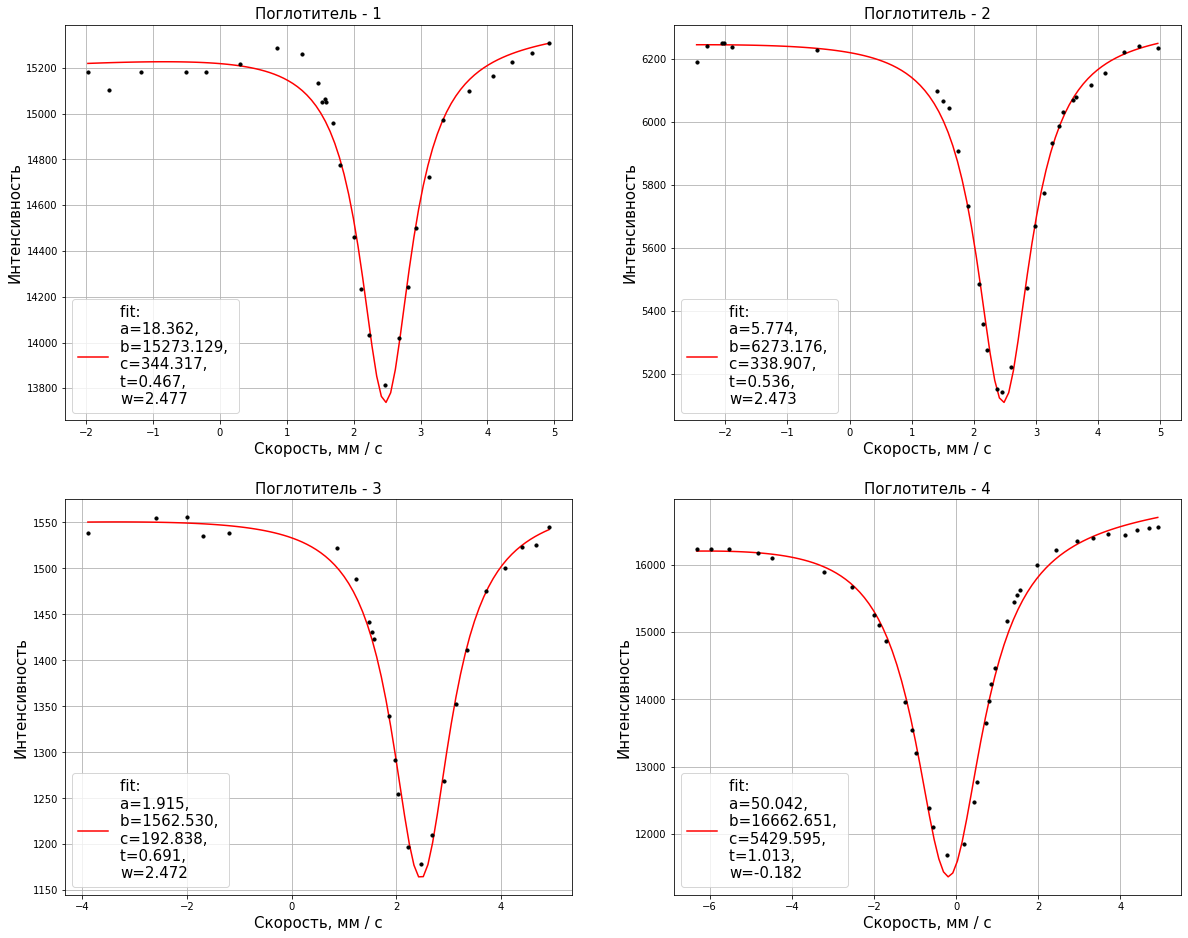

In [120]:
fig,ax=plt.subplots(2, 2, figsize=(20,16)) 
for k in range (1, 5, 1):
    plt.sca(ax[(k - 1)//2, (k - 1)%2])
    
    out = pd.read_csv(str(k) + ".csv", decimal=",") 
    out.sort_values(["x"], axis = 0, inplace = True)
    out.plot(ax = ax[(k - 1)//2, (k - 1)%2],kind = "scatter",  x = 'x', y = 'y', color = "black", s = 10, zorder = 10, label = None)
    

    xdata = out["x"]
    ydata = out["y"]
    xdata_2 = np.linspace(min(xdata), max(xdata), 100)
    p0 = [0, max(ydata),( max(ydata) - min(ydata)) ,1, xdata[np.argmin(ydata)] ]
 
    popt,pcov = curve_fit(func2, xdata, ydata, p0 = p0)
    perr = np.sqrt(np.diag(pcov))
#     print( perr, "\n")
   
    plt.plot(xdata_2, func2(xdata_2, *popt), 'r-',
         label='fit: \na=%5.3f, \nb=%5.3f, \nc=%5.3f, \nt=%5.3f, \nw=%5.3f' % tuple(popt))
    plt.legend(fontsize = 15, loc = 3)
    
    plt.ylabel(r"Интенсивность",size=15)
    plt.xlabel(r"Скорость, мм / с",size=15)
    ax[(k - 1)//2, (k - 1)%2].set_title("Поглотитель - " + str(k), fontsize = 15)
    plt.grid()
    print((popt[2])/ (popt[1] * popt[3] ** 2) * 100, popt[4], popt[4] * 23.8/3,  popt[3] *2 , popt[3] *2  * 23.8/3  )
    
    y = func2(xdata, *popt)
    print(chisquare(ydata, f_exp = y))
#     kf_data = np.array([[ydata], [y]])
#     kf = chi2_contigency(kf_data)
fig.savefig("loretz.png")